### 2. Polynomial regression

##### 1.1  Plot data

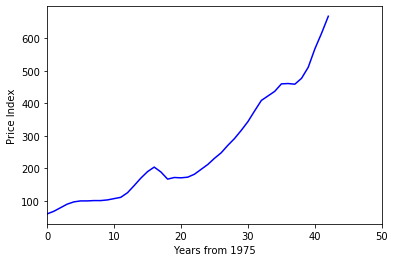

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import path
import util

data = np.genfromtxt(path.join('data/housing_price_index.csv'), delimiter=',', dtype=float)

X = data[:, 0]
y = np.array(data[:, 1])


plt.xlabel('Years from 1975')
plt.ylabel('Price Index')
plt.xlim(0, 50)
plt.plot(X, y, color="blue")
plt.show()

##### 1.2 Polynomial models

##### Best fit?

The best fit is the model with the lowest cost function -> lowest MSE.
In this case I would choose polynomial model X4.


MSE X1:  2896.093679981457
MSE X2:  585.0675759009071
MSE X3:  454.5434507726961
MSE X4:  443.7602521836899


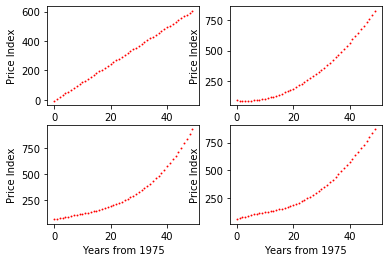

In [2]:
X1 = util.extendMatrix(np.array([X]).T)
X2 = util.extendMatrix(np.array([X, X**2]).T)
X3 = util.extendMatrix(np.array([X, X**2, X**3]).T)
X4 = util.extendMatrix(np.array([X, X**2, X**3, X**4]).T)


plt.subplots(nrows=3, ncols=3)

y_res = []
for x in range(0, 50):
    target = np.array([1, x])
    y_res.append(util.normalEq(X1, y, target))
util.createSubScatterPlot(np.arange(0, 50), y_res, x_label='Years from 1975', y_label='Price Index', row=2, col=2, nr=1)
print("MSE X1: ", util.cost(X1, y, util.calcBeta(X1, y)))

y_res = []
for x in range(0, 50):
    y_res.append(util.normalEq(X2, y,np.array([1, x, x**2])))
util.createSubScatterPlot(np.arange(0, 50), y_res, x_label='Years from 1975', y_label='Price Index', row=2, col=2, nr=2)
print("MSE X2: ", util.cost(X2, y, util.calcBeta(X2, y)))

y_res = []
for x in range(0, 50):
    y_res.append(util.normalEq(X3, y, np.array([1, x, x**2, x**3])))
util.createSubScatterPlot(np.arange(0, 50), y_res, x_label='Years from 1975', y_label='Price Index', row=2, col=2, nr=3)
print("MSE X3: ", util.cost(X3, y, util.calcBeta(X3, y)))

y_res = []
for x in range(0, 50):
    y_res.append(util.normalEq(X4, y, np.array([1, x, x**2, x**3, x**4])))
util.createSubScatterPlot(np.arange(0, 50), y_res, x_label='Years from 1975', y_label='Price Index', row=2, col=2, nr=4)
print("MSE X4: ", util.cost(X4, y, util.calcBeta(X4, y)))

##### 1.3 House index prediction

#### Is the answer realistic? 

The current model states that if the the trend continues the model will predict a value of 3,236,749 kr
according to (price*index 2022 / index_2015).

It is however unclear if the trend continues. The model is trained on historic data from 1975-2017 which does not
include the last three years of data. Current events such as the Covid-19 crisis has made the stock market
extremely volatile and unpredictable and we have not yet seen the effects.

There are also some uncertainty on the data. I'm not quite sure of the data source and how many samples is used
to produce the index values. I think however that the prediction can be a good pointer but should be considered
with a grain of salt.

In [5]:
index_2022 = util.normalEq(X4, y, np.array([1, 47, 47**2, 47**3, 47**4]))
index_2015 = 568

print("2022 price index prediciton: ", index_2022)
print("House price prediction (kr): ", int((2_300_000*index_2022)/index_2015))

# Pick lowest cost function -> smallest MSE which is X4
plt.show()

2022 price index prediciton:  799.3364217395016
House price prediction (kr):  3236749
